## The Sparks Foundation GRIP March 2022
## Internship - Data Science and Business Analytics

Author: Dion Philip

## Task 1: Prediction using Supervised ML

### Problem Statement: What will be the predicted score if a student studies for 9.25 hours/day?

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

### Reading the dataset

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the distribution of scores

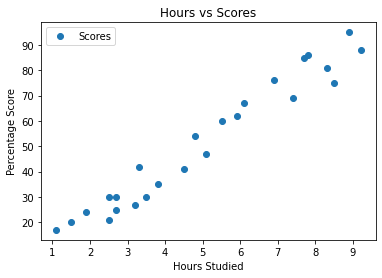

In [7]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Correlation

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

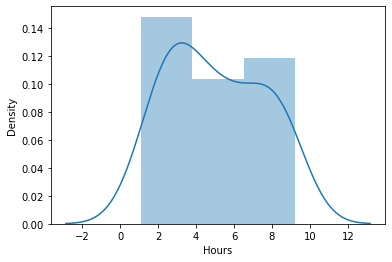

In [9]:
sns.distplot(data['Hours'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

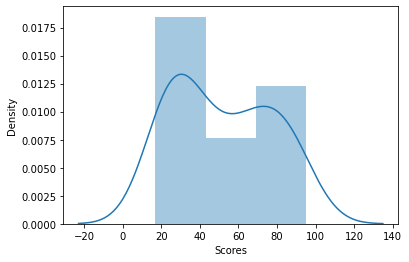

In [10]:
sns.distplot(data['Scores'])

## OLS regression model

In [11]:
import statsmodels.formula.api as smf

#### OLS - Ordinary Least Squares

In [12]:
model = smf.ols('Scores~Hours',data=data).fit()

#### To see the best fit line (which is as close as possible to as many points as possible)

Text(0.5, 1.0, 'Plotting the best fit line')

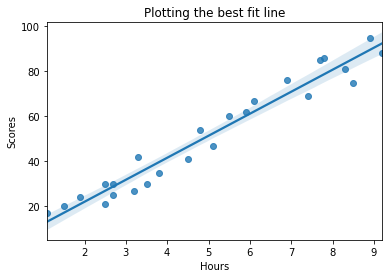

In [13]:
sns.regplot(x='Hours',y='Scores', data=data)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Plotting the best fit line')

### Predicted values

In [14]:
model.fittedvalues

0     26.923182
1     52.340271
2     33.766244
3     85.578002
4     36.698985
5     17.147378
6     92.421065
7     56.250592
8     83.622842
9     28.878343
10    77.757360
11    60.160913
12    46.474789
13    34.743825
14    13.237057
15    89.488324
16    26.923182
17    21.057700
18    62.116074
19    74.824618
20    28.878343
21    49.407530
22    39.631726
23    69.936717
24    78.734940
dtype: float64

### Finding the b0 and b1 coefficients for y=b0+b1*x

In [15]:
model.params

Intercept    2.483673
Hours        9.775803
dtype: float64

In [16]:
model.rsquared

0.9529481969048356

### Difference between actual and predicted values

In [17]:
model.resid

0     -5.923182
1     -5.340271
2     -6.766244
3    -10.578002
4     -6.698985
5      2.852622
6     -4.421065
7      3.749408
8     -2.622842
9     -3.878343
10     7.242640
11     1.839087
12    -5.474789
13     7.256175
14     3.762943
15     5.511676
16     3.076818
17     2.942300
18     4.883926
19    -5.824618
20     1.121657
21     4.592470
22    -4.631726
23     6.063283
24     7.265060
dtype: float64

In [18]:
#R Squared Values & R Adjusted Squared Values
model.rsquared, model.rsquared_adj

(0.9529481969048356, 0.9509024663354806)

### Plotting the Linear model

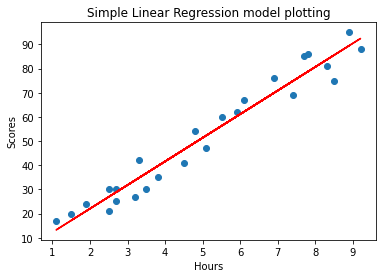

In [19]:
plt.scatter(x=data['Hours'],y=data['Scores'])
plt.plot(data['Hours'],model.fittedvalues,color='red')
plt.title("Simple Linear Regression model plotting")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Calculating the RMSE for SLR model

In [20]:
np.sqrt(np.mean((data.Scores-model.fittedvalues)**2))

5.374265578592619

## Predict the score if a student studies for 9.25 hrs/day?

In [21]:
#Predict for 9.25 hours
newdata=pd.Series([9.25]) 
newdata

0    9.25
dtype: float64

In [22]:
new_pred = pd.DataFrame(newdata, columns=['Hours'])
new_pred

,Hours
0,9.25


In [23]:
new_pred['Predicted'] = model.predict(new_pred)
new_pred

,Hours,Predicted
0,9.25,92.909855


In [24]:
model.params

Intercept    2.483673
Hours        9.775803
dtype: float64

In [25]:
# Manual Calculations
2.483673 + 9.775803*9.25

92.90985074999999

## If a student studies for 9.25 hrs/day, the predicted score would be 92.909855.